In [151]:
#!pip install jupyterlab-hide-code
#!pip install --upgrade jupyterlab

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, IntSlider
from IPython.display import display, HTML
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
import plotly.express as px
from ipywidgets import interact, widgets

Importing the data

In [153]:
fao_data = pd.read_csv("DATA/clean_fao_informaton.csv")

In [154]:
fao_data.head()

,country,cpc_code,commodity,year,loss_percentage,food_supply_stage,group,description,activity_1,activity_2,cause_loss_1,cause_loss_2
0,Myanmar,23161.02,"Rice, milled",2015,1.78,Storage,231,Grain mill products,Storage,NaN,NaN,NaN
1,Myanmar,23161.02,"Rice, milled",2015,11.77,Storage,231,Grain mill products,Storage,NaN,NaN,NaN
2,Myanmar,23161.02,"Rice, milled",2015,5.88,Storage,231,Grain mill products,Storage,NaN,NaN,NaN
3,Myanmar,23161.02,"Rice, milled",2015,3.57,Storage,231,Grain mill products,Storage,NaN,NaN,NaN
4,Myanmar,23161.02,"Rice, milled",2015,17.65,Storage,231,Grain mill products,Storage,NaN,NaN,NaN


# <u> 1- WHERE:
The primary objective is to observe the distribution of food loss across different countries. Specifically:

1- Firstly, verify the number of food groups studied in different countries

2- How countries analyzed the different food groups classification through the years

3- Food loss by food group.

### <u> 1.1- Visualize how many times each group of food has been analized by the different countries through the years

country_food_group = dataframe containing information regardin the country, year quantity of food groups analized and average loss percentaje per country and year.

In [155]:
country_food_group = fao_data.groupby(['country', 'year']).agg(num_groups=('group', 'count'), mean_loss_percentage=('loss_percentage', 'mean')).reset_index()

In [156]:
country_food_group

,country,year,num_groups,mean_loss_percentage
0,Algeria,2005,1,25.000000
1,Angola,2000,33,2.518395
2,Angola,2001,33,2.531599
3,Angola,2002,33,2.534783
4,Angola,2003,33,2.528430
...,...,...,...,...
1103,Zimbabwe,2017,20,2.779971
1104,Zimbabwe,2018,90,4.519720
1105,Zimbabwe,2019,20,2.756332
1106,Zimbabwe,2020,20,2.581415


Quantity of data we have for each column:

In [157]:
print (f" years = {len(country_food_group.year.unique())} \n"
      f" country = {len(country_food_group.country.unique())} \n"
      f" num_groups = {len(country_food_group.num_groups.unique())} \n")

 years = 23 
 country = 111 
 num_groups = 76 



as there are many years, for visualization we will just display the last 6 years

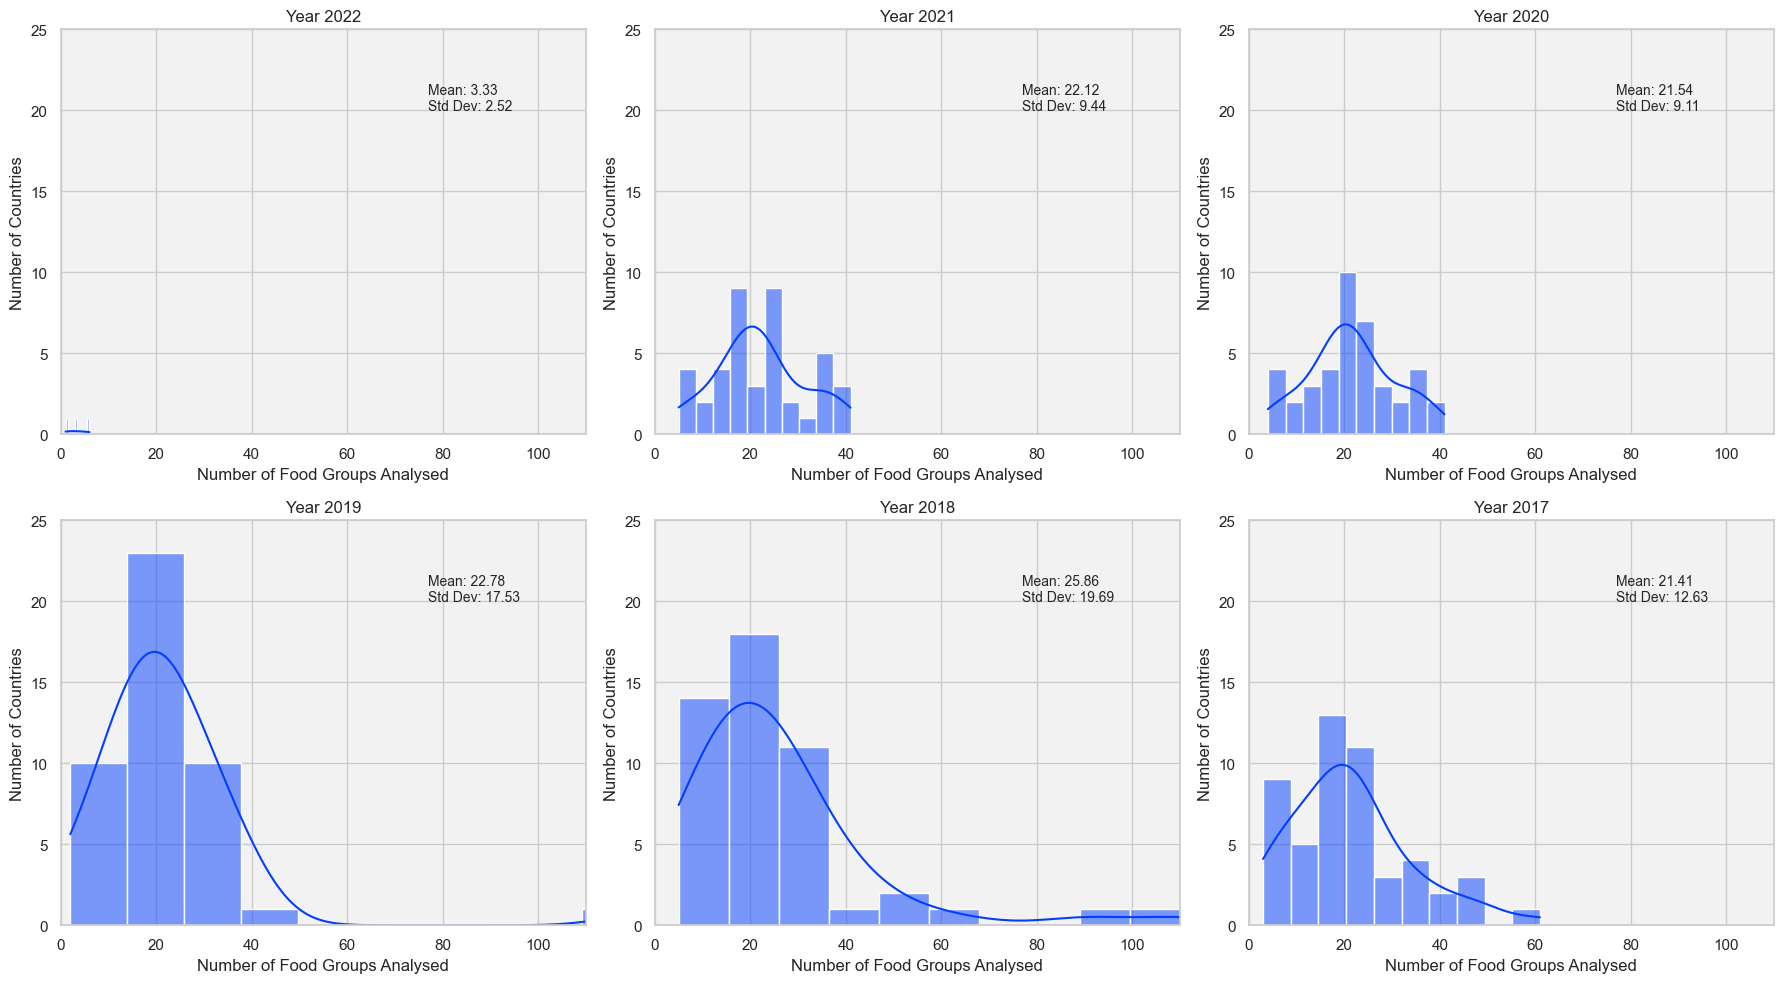

In [158]:
filtered_data = country_food_group[country_food_group['year'] <= 2022]
unique_years = filtered_data['year'].unique()
unique_years = sorted(unique_years, reverse=True)

# Determine the number of subplots needed based on the number of unique years
num_subplots = min(len(unique_years), 6)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Flatten axes for easy indexing
axes = axes.flatten()

# Iterate over unique years and create histograms
for i, year in enumerate(unique_years[:num_subplots]):
    # Filter data for the current year
    year_data = filtered_data[filtered_data['year'] == year]
    
    # Plot histogram
    sns.histplot(data=year_data, x='num_groups', ax=axes[i], bins=10, kde=True)
    
    # Calculate mean and standard deviation
    mean = year_data['num_groups'].mean()
    std_dev = year_data['num_groups'].std()
    
    # Add annotations for mean and standard deviation
    axes[i].annotate(f'Mean: {mean:.2f}\nStd Dev: {std_dev:.2f}', xy=(0.7, 0.8), xycoords='axes fraction', fontsize=10)
    
    # Set title for each subplot
    axes[i].set_title(f'Year {year}')
    
    # Set x-axis label
    axes[i].set_ylabel('Number of Countries')
    
    # Set y-axis label
    axes[i].set_xlabel('Number of Food Groups Analysed')
    
    # Set x-axis limits
    axes[i].set_xlim(0, 110)
    
    # Set y-axis limits
    axes[i].set_ylim(0, 25)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


It is clear that we almost have no data of 2022 and number the year with highest number of data is 2019 of these 6 last years displayed.
Let's display number of data along the years to have a better overview

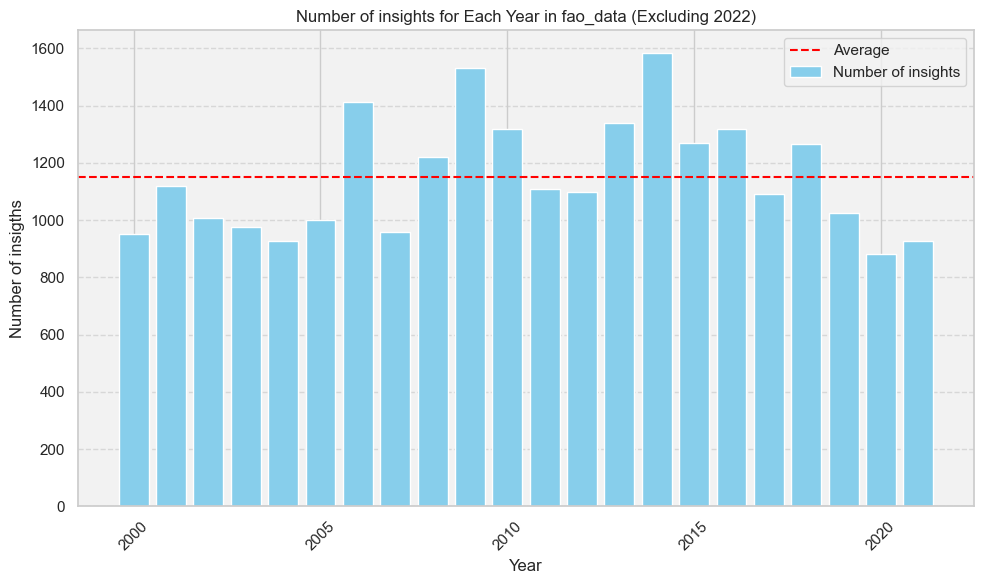

In [159]:
# Exclude 2022 from the data
filtered_data = fao_data[fao_data['year'] != 2022]

# Count the number of rows for each year
year_counts = filtered_data['year'].value_counts().sort_index()

# Calculate the average number of rows across all years
average_rows = year_counts.mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(year_counts.index, year_counts.values, color='skyblue', label='Number of insights')
plt.axhline(y=average_rows, color='red', linestyle='--', label='Average')
plt.title('Number of insights for Each Year in fao_data (Excluding 2022)')
plt.xlabel('Year')
plt.ylabel('Number of insigths')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




Make it possible to display detailed information regarding each country and number of gruoups analyzed during a selected range of years

In [160]:
def show_recs_more_than(
    country='United States', 
    start_year=2000,
    end_year=2022
):
    """
    Display records for a given country and range of years.

    Parameters:
    country (str): The country for which to display records. Defaults to 'United States'.
    start_year (int): The starting year of the range of years to consider. Defaults to 2000.
    end_year (int): The ending year of the range of years to consider. Defaults to 2022.

    Returns:
    None
    """
    # Filter data for the specified country and range of years
    filtered_data = country_food_group[(country_food_group['country'] == country) & 
                                       (country_food_group['year'] >= start_year) &
                                       (country_food_group['year'] <= end_year)]
    
    # Display records for the specified country and years
    display(HTML(f'<h1>Records for {country} between {start_year} and {end_year}<h1>'))
    display(filtered_data.loc[:, ['year', 'num_groups', 'mean_loss_percentage']])
    
    # Calculate average and standard deviation of 'num_groups'
    avg_groups = filtered_data['num_groups'].mean()
    total_groups = filtered_data['num_groups'].sum()
    std_dev = filtered_data['num_groups'].std()
    
    # Calculate average loss food based on 'mean_loss_percentage'
    avg_loss_food = filtered_data['mean_loss_percentage'].mean() # Assuming 'loss_percentage' represents percentage
    
    # Display average and standard deviation of 'num_groups'
    display(HTML(f'<h2>Total number of groups analyzed: {total_groups:.2f}<h2>'))
    display(HTML(f'<h2>Average number of groups analyzed: {avg_groups:.2f}<h2>'))
    display(HTML(f'<h2>Standard Deviation: {std_dev:.2f}<h2>'))
    
    # Display average loss food
    display(HTML(f'<h2>Average loss food: {avg_loss_food:.2f}%<h2>'))

    return  # Add this line to prevent displaying the function signature

# Define min_year and max_year
min_year = country_food_group['year'].min()
max_year = country_food_group['year'].max()

# Create interactive widget
interact(show_recs_more_than,
         country=country_food_group['country'].unique(), 
         start_year=IntSlider(min=min_year, max=max_year, step=1, value=min_year),
         end_year=IntSlider(min=min_year, max=max_year, step=1, value=max_year))


interactive(children=(Dropdown(description='country', options=('Algeria', 'Angola', 'Argentina', 'Armenia', 'A…

<function __main__.show_recs_more_than(country='United States', start_year=2000, end_year=2022)>

### <u> 1.2- Visualize how many times a country has analized by the different groups of food through the years

Visualization using plots for the last 6 years

In [161]:
group_food_analysis = fao_data.groupby(['group', 'year']).agg(num_countries=('country', 'count'), mean_loss_percentage=('loss_percentage', 'mean')).reset_index()

In [162]:
group_food_analysis.head()

,group,year,num_countries,mean_loss_percentage
0,11,2000,862,2.748577
1,11,2001,875,2.989075
2,11,2002,870,2.756161
3,11,2003,858,2.706506
4,11,2004,861,2.741779


On each column, the number of countries that reported data on food loss for that group of food is displayed

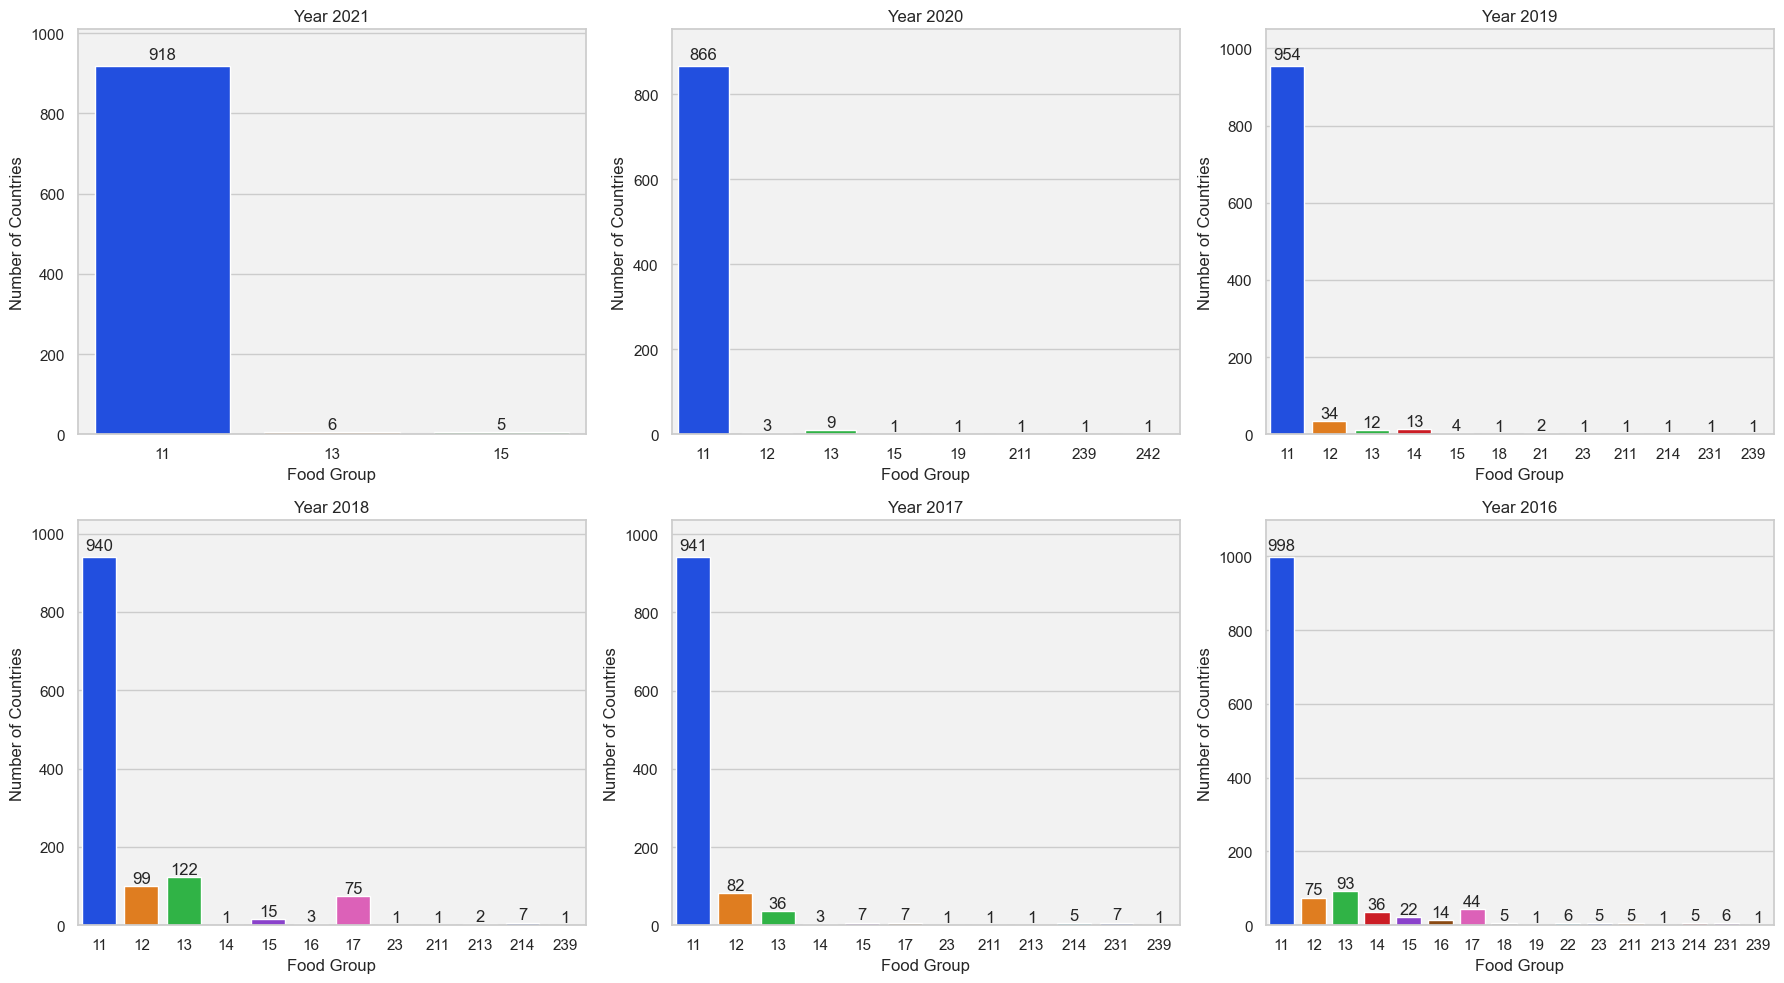

In [163]:
filtered_data = group_food_analysis[group_food_analysis['year'] < 2022]
unique_years = filtered_data['year'].unique()
unique_years = sorted(unique_years, reverse=True)

# Determine the number of subplots needed based on the number of unique years
num_subplots = min(len(unique_years), 6)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Flatten axes for easy indexing
axes = axes.flatten()

# Iterate over unique years and create bar plots
for i, year in enumerate(unique_years[:num_subplots]):
    # Filter data for the current year
    year_data = filtered_data[filtered_data['year'] == year]
    
    # Plot bar plot
    sns.barplot(data=year_data, x='group', y='num_countries', ax=axes[i], palette='bright')
   
    # Set title for each subplot
    axes[i].set_title(f'Year {year}')
    
    # Set x-axis label
    axes[i].set_xlabel('Food Group')
    
    # Set y-axis label
    axes[i].set_ylabel('Number of Countries')
    
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x')
    
    # Set x-axis limits
    axes[i].set_xlim(-0.5, len(year_data['group']) - 0.5)
    
    # Set y-axis limits
    axes[i].set_ylim(0, max(year_data['num_countries']) * 1.1)
    
    # Add annotations to display the number of countries on each bar
    for bar in axes[i].patches:
        # Get the height of the bar
        height = bar.get_height()
        # Add text annotation above the bar
        axes[i].text(bar.get_x() + bar.get_width() / 2, height * 1.01, f'{height:.0f}', ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

It is clear that, overwhelmingly, the most studied group is group 11, followed by 12 and 13, and finally 15 and 214. The following table shows th number of countries that studied thesee  grroup through the yearss As the difference between group 11 and the rest is very high we will plot all together and in another plot just the top 5 except group 11.


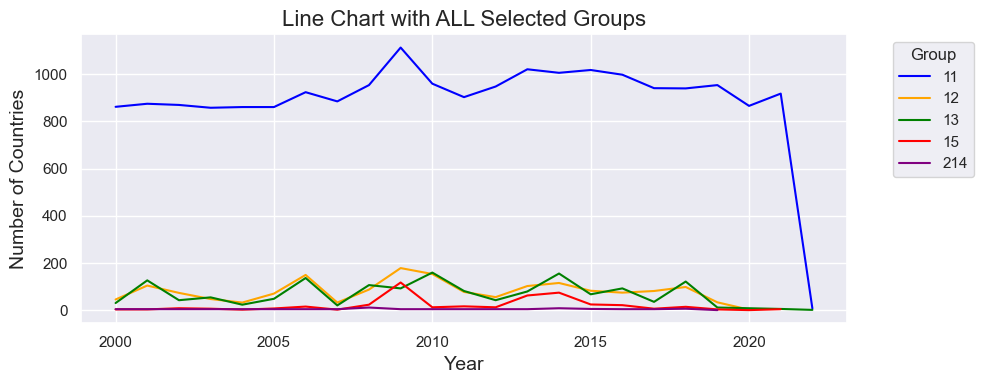

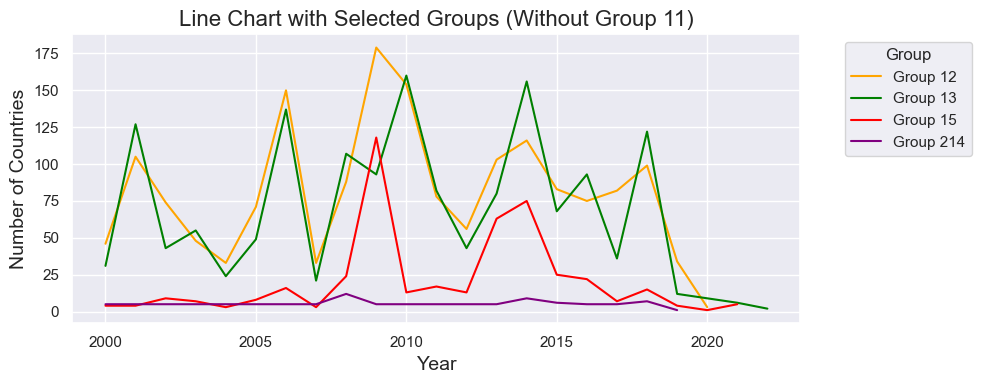

In [164]:
filtered_data = group_food_analysis[group_food_analysis['group'].isin([11, 12, 13, 15, 214])]
sns.set_style("whitegrid")
sns.set_theme()
color_palette = {11: 'blue', 12: 'orange', 13: 'green', 15: 'red', 214: 'purple'}
# Create the plot
plt.figure(figsize=(10, 4))
sns.lineplot(data=filtered_data, x="year", y="num_countries", hue="group", palette=color_palette)
plt.title("Line Chart with ALL Selected Groups", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Countries", fontsize=14)
plt.legend(title="Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

sns.set_style("whitegrid")
sns.set_theme()
plt.figure(figsize=(10, 4))
for group, data in filtered_data.groupby('group'):
    if group != 11:
        plt.plot(data['year'], data['num_countries'], color=color_palette[group], label=f"Group {group}")
plt.title("Line Chart with Selected Groups (Without Group 11)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Countries", fontsize=14)
plt.legend(title="Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


Group 11 is quite stable through the years, all the others are quiet irregualar. To better undestand which is each group here they are its descriptions

In [165]:
pd.set_option('display.max_colwidth', None)
desired_groups = [ 11,12,13,15,214]
descriptions = fao_data[fao_data['group'].isin(desired_groups)][['group','description']].drop_duplicates()

In [166]:
descriptions

,group,description
6,11,Cereals
512,12,Vegetables
562,15,Edible roots and tubers with high starch or inulin content
593,13,Fruit and nuts
5924,214,Prepared and preserved fruit and nuts\n


It is clear that cereals group is the far more analyzed group.

### <u> 1.3- Food loss by food group.

The final step in the WHERE analysis is to visualize the average loss for each commodity over the years.

To start it is important to visualize the groups with the highest number of events yearly. As we know cereals is, by far, the one with most events we plot it separetly so we can  visualize the other years.

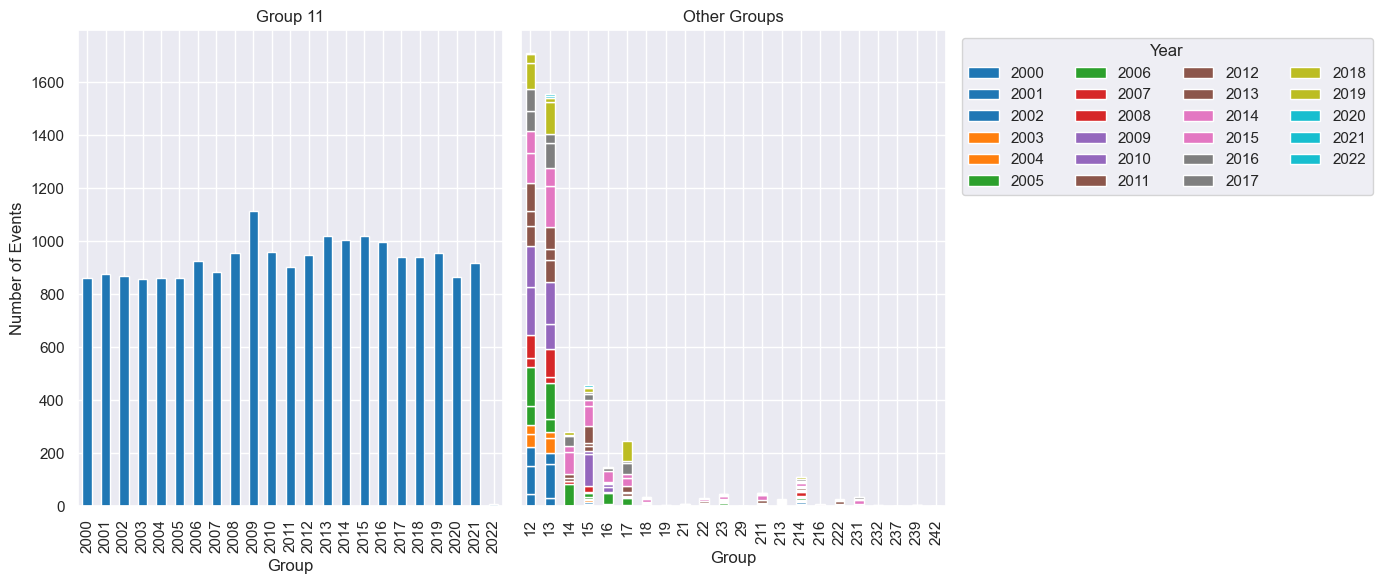

In [167]:
# Group by year and group, and count the number of events
grouped_data = fao_data.groupby(['year', 'group']).size().reset_index(name='count')

# Pivot the DataFrame to have years as columns
pivot_df = grouped_data.pivot(index='group', columns='year', values='count').fillna(0)

# Generate the bar plots for each group
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for group 11
pivot_df.loc[11].plot(kind='bar', stacked=True, cmap='tab10', ax=axs[0])
axs[0].set_title('Group 11')
axs[0].set_xlabel('Group')
axs[0].set_ylabel('Number of Events')


# Plot for other groups
other_groups_df = pivot_df.drop(11)
other_groups_df.plot(kind='bar', stacked=True, cmap='tab10', ax=axs[1])
axs[1].set_title('Other Groups')
axs[1].set_xlabel('Group')
axs[1].set_ylabel('Number of Events')

# Adjust legend for the second plot
axs[1].legend(title='Year', bbox_to_anchor=(1.02, 1), loc='upper left', ncol=4)

# Adjust layout
plt.tight_layout()
plt.show()


In [168]:
loss_by_group = fao_data[['year','country','group','loss_percentage']].groupby(['year','group']).aggregate({'country': 'count', 'loss_percentage':'mean'}).reset_index()

<Figure size 600x300 with 0 Axes>

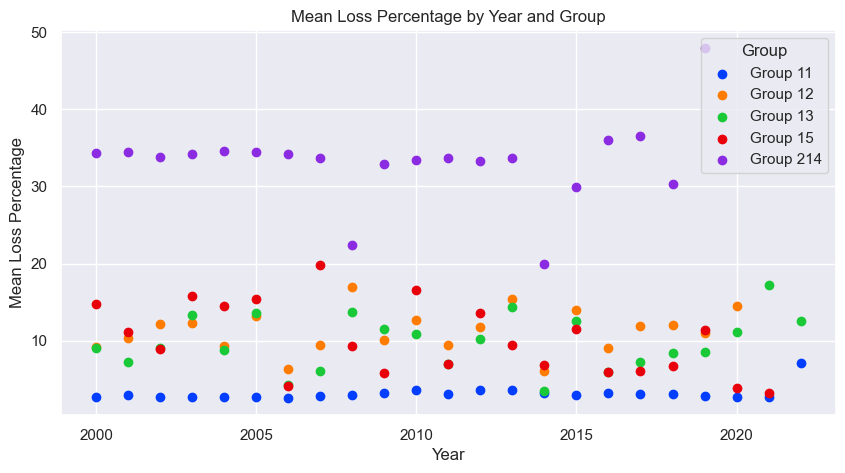

In [169]:
small_group = loss_by_group[loss_by_group['group'].isin([11,12,13,15,214])]
groups = small_group['group'].unique()
plt.figure(figsize= (6,3))
palette = sns.color_palette("bright", len(groups))

# Crear el scatter plot
plt.figure(figsize=(10, 5))
for group, color in zip(groups, palette):
    group_data = small_group[loss_by_group['group'] == group]
    plt.scatter(group_data['year'], group_data['loss_percentage'], label=f"Group {group}", color=color, marker='o')

plt.title('Mean Loss Percentage by Year and Group')
plt.xlabel('Year')
plt.ylabel('Mean Loss Percentage')
plt.legend(title='Group', loc = 'upper right')
plt.grid(True)
plt.show();

It is clear that the group with the highest loss percentage is 214 ('Prepared and preserved fruit and nuts'), and the one with the lowest is 11 ('Cereals').

Let's see what is the impact in total quantity of looses reported yearly

<Figure size 600x200 with 0 Axes>

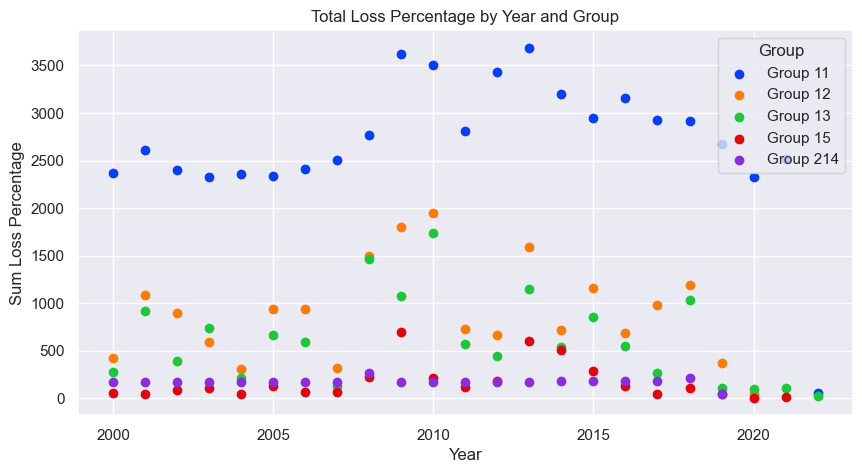

In [170]:
total_loss_group = fao_data[['year','country','group','loss_percentage']].groupby(['year','group']).aggregate({'country': 'count', 'loss_percentage':'sum'}).reset_index()
small_group_2 = total_loss_group[total_loss_group['group'].isin([11,12,13,15,214])]
groups = small_group_2['group'].unique()
plt.figure(figsize= (6,2))
palette = sns.color_palette("bright", len(groups))

# Crear el scatter plot
plt.figure(figsize=(10, 5))
for group, color in zip(groups, palette):
    group_data = small_group_2[loss_by_group['group'] == group]
    plt.scatter(group_data['year'], group_data['loss_percentage'], label=f"Group {group}", color=color, marker='o')

plt.title('Total Loss Percentage by Year and Group')
plt.xlabel('Year')
plt.ylabel('Sum Loss Percentage')
plt.legend(title='Group', loc = 'upper right')
plt.grid(True)
plt.show();

Although group 214 had a big percentaje the number of events is smaller so, it has lower impact. As expected, Cereals (group 11) despite having a low percentaje of loss, because of the number
of events is the one that has higher impact in loss food quantity

Going deeper in the cereals group which is the one with more impact (As Mixed grain has a very "strange" behabiour it will be removed from the plots)

In [171]:
print (f"in the 11 group (Cereals) we have {len(fao_data[fao_data['group']== 11].commodity.unique())} commodities")

in the 11 group (Cereals) we have 11 commodities


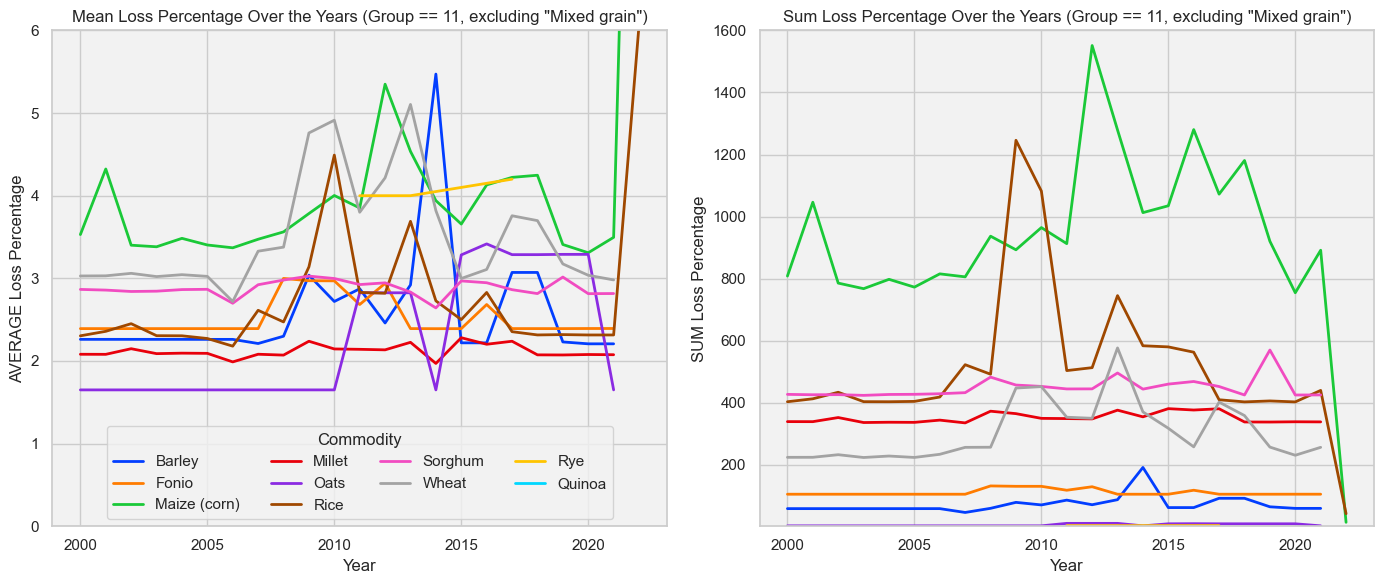

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style to whitegrid
sns.set_style("whitegrid")

# Set palette to "bright"
sns.set_palette("bright")

# Set background color to a clear grey
sns.set_theme(style="whitegrid", palette="bright", rc={"axes.facecolor": ".95"})

# Filter the data
filtered_data = fao_data[(fao_data['group'] == 11) & (~fao_data['commodity'].str.contains('Mixed grain'))]

# Create two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot mean loss percentage
df1 = filtered_data[['year','commodity', 'loss_percentage']].groupby(['year', 'commodity']).aggregate({'loss_percentage': 'mean'})
sns.lineplot(data=df1, x='year', y='loss_percentage', hue='commodity', ax=axs[0], linewidth=2, ci=None)
axs[0].set_title('Mean Loss Percentage Over the Years (Group == 11, excluding "Mixed grain")')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('AVERAGE Loss Percentage')
axs[0].set_ylim(0, 6)
axs[0].legend(title='Commodity', loc='lower center', bbox_to_anchor=(0.5, 0), ncol=4)

# Plot sum loss percentage
df2 = filtered_data[['year','commodity', 'loss_percentage']].groupby(['year', 'commodity']).aggregate({'loss_percentage': 'sum'})
sns.lineplot(data=df2, x='year', y='loss_percentage', hue='commodity', ax=axs[1], linewidth=2, ci=None, legend=False)
axs[1].set_title('Sum Loss Percentage Over the Years (Group == 11, excluding "Mixed grain")')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('SUM Loss Percentage')
axs[1].set_ylim(2, 1600)

# Show the plots
plt.tight_layout()
plt.show()




Within the analysis of commodities within group 11 ('Cereals'), we do observe a correlation in both the average and total impact of corn which is the 

### <span style="color: darkblue;"><u>CONCLUSIONS:

<span style="color: darkblue;">**1-The average number of reports per year is slightly less than 1200 and has decreased in the last two complete years of the study (2021 and 2020), possibly due to the time it takes for certain countries to collect and report this type of information.**

<span style="color: darkblue;">**2- The group with the highest percentage of loss is the 214 ('Prepared and preserved fruit and nuts'), but, since it has fewer incidents, the overall volume of losses for this group is small.**

<span style="color: darkblue;">**3- The majority of food loss reports in the vast majority of countries correspond to group 11 (Cereals). Within the commodities of this group, maize is the one that accounts for the highest volume of losses.**






# <u> 2- WHEN:
In this second part of the study, the objective is to visualize at which stage in the process, between post-harvest and arrival at retailers, food loss occurs as well as the activity.

In [173]:
fao_data.food_supply_stage.unique()

array(['Storage', 'Harvest', 'Farm', nan, 'Post-harvest', 'Retail',
       'Wholesale', 'Trader', 'Whole supply chain', 'Processing',
       'Transport', 'Distribution', 'Households', 'Food Services',
       'Export', 'Pre-harvest', 'Market', 'Collector', 'Stacking',
       'Packing', 'Grading'], dtype=object)

First we will see which were the stages and activites reported in the dataframe:

In [174]:
print (f" reported stages = {fao_data['food_supply_stage'].unique()}\n"
       "\n"
       f" total reported stages = {len(fao_data['food_supply_stage'].unique())}\n"
        "\n"
       f"-----------------\n"
        "\n"
      f"reported activities = {fao_data.activity_1.unique()}, {fao_data.activity_2.unique()} \n"
       "\n"
        f"reported activities = {len(fao_data.activity_1.unique())+ len(fao_data.activity_2.unique())}")

 reported stages = ['Storage' 'Harvest' 'Farm' nan 'Post-harvest' 'Retail' 'Wholesale'
 'Trader' 'Whole supply chain' 'Processing' 'Transport' 'Distribution'
 'Households' 'Food Services' 'Export' 'Pre-harvest' 'Market' 'Collector'
 'Stacking' 'Packing' 'Grading']

 total reported stages = 21

-----------------

reported activities = ['Storage' 'Drying' 'Shelling' 'Transportation' 'Winnowing' nan 'Farm'
 'Retailing' 'Wholesale' 'Collection' 'Processing' 'Harvesting' 'Cleaning'
 'Marketing' 'Distribution' 'Consumption' 'Handling' 'Grading' 'Threshing'
 'Sorting' 'Peeling' 'Stacking' 'Exporting' 'Manufacturing' 'Trading'
 'Packaging' 'Preservation' 'Milling' 'Sifting' 'Grating' 'Roasting'
 'Dewatering' 'Assembling' 'Loading' 'Bagging' 'Ripening' 'Lifting'
 'Curing' 'Parboiling' 'Bundling' 'Piling' 'Blanching' 'Layering'
 'Bulking'], [nan 'Harvesting' 'Threshing' 'Marketing' 'Ripening' 'Collection' 'Farm'
 'Wholesale' 'Sorting' 'Storage' 'Trading' 'Handling' 'Processing'
 'Transportation'

### <u> 2.1- Visualize the different stages recurrency :
- through the years
- by food group
- by country


Firs visual will let us see the overall stage with more reports and the one with highest volume of food loss

In [175]:
stages_df = fao_data[['year', 'country', 'group', 'food_supply_stage','loss_percentage']]

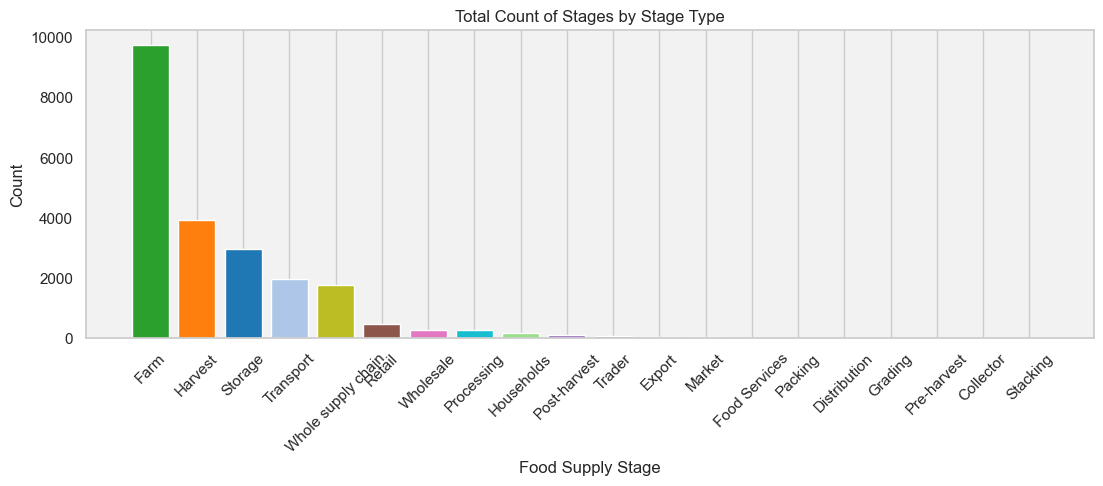

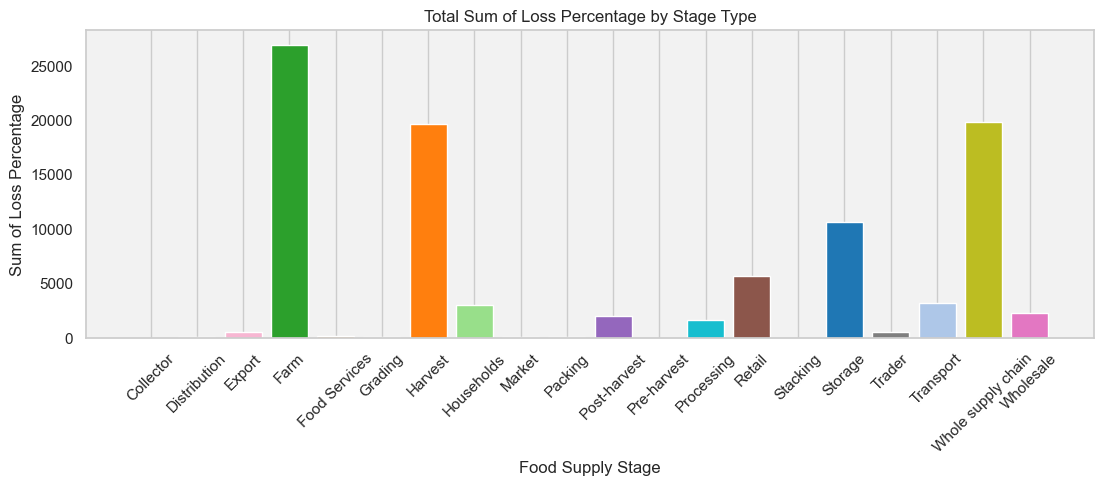

In [176]:
import matplotlib.pyplot as plt
color_palette = {
    'Storage': '#1f77b4', 'Harvest': '#ff7f0e', 'Farm': '#2ca02c', 'nan': '#d62728', 
    'Post-harvest': '#9467bd', 'Retail': '#8c564b', 'Wholesale': '#e377c2', 'Trader': '#7f7f7f', 
    'Whole supply chain': '#bcbd22', 'Processing': '#17becf', 'Transport': '#aec7e8', 
    'Distribution': '#ff9896', 'Households': '#98df8a', 'Food Services': '#ffbb78', 
    'Export': '#f7b6d2', 'Pre-harvest': '#c5b0d5', 'Market': '#c49c94', 'Collector': '#f2b4c6', 
    'Stacking': '#dbdb8d', 'Packing': '#9edae5', 'Grading': '#d62728'}
    
# Aggregate data to get total count of stages per stage type
count_per_stage_type = stages_df['food_supply_stage'].value_counts().reset_index()
count_per_stage_type.columns = ['food_supply_stage', 'count']

# Aggregate data to get total sum of loss percentage per stage type
sum_loss_per_stage_type = stages_df.groupby('food_supply_stage')['loss_percentage'].sum().reset_index()

# Create the first bar plot to show the total count of stages per stage type
plt.figure(figsize=(13, 4))
plt.bar(count_per_stage_type['food_supply_stage'], count_per_stage_type['count'], color=[color_palette[stage] for stage in count_per_stage_type['food_supply_stage']])
plt.title('Total Count of Stages by Stage Type')
plt.xlabel('Food Supply Stage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Create the second bar plot to show the total sum of loss percentage per stage type
plt.figure(figsize=(13, 4))
plt.bar(sum_loss_per_stage_type['food_supply_stage'], sum_loss_per_stage_type['loss_percentage'], color=[color_palette[stage] for stage in sum_loss_per_stage_type['food_supply_stage']])
plt.title('Total Sum of Loss Percentage by Stage Type')
plt.xlabel('Food Supply Stage')
plt.ylabel('Sum of Loss Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Second visual will let us see the frequency of each stage through the years or by group by changing the selected value.

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

color_palette = {
    'Storage': '#1f77b4', 'Harvest': '#ff7f0e', 'Farm': '#2ca02c', 'nan': '#d62728', 
    'Post-harvest': '#9467bd', 'Retail': '#8c564b', 'Wholesale': '#e377c2', 'Trader': '#7f7f7f', 
    'Whole supply chain': '#bcbd22', 'Processing': '#17becf', 'Transport': '#aec7e8', 
    'Distribution': '#ff9896', 'Households': '#98df8a', 'Food Services': '#ffbb78', 
    'Export': '#f7b6d2', 'Pre-harvest': '#c5b0d5', 'Market': '#c49c94', 'Collector': '#f2b4c6', 
    'Stacking': '#dbdb8d', 'Packing': '#9edae5', 'Grading': '#d62728'
}

@interact
def scatter_plot(x_axis=['year', 'group']):
    if x_axis == 'year':
        # Aggregate data to get count of occurrences of each food supply stage for each year
        count_per_x_stage = stages_df.groupby(['year', 'food_supply_stage']).size().reset_index(name='count')
        x_label = 'Year'
        x_values = 'year'
    else:
        # Aggregate data to get count of occurrences of each food supply stage for each group
        count_per_x_stage = stages_df.groupby(['group', 'food_supply_stage']).size().reset_index(name='count')
        x_label = 'Group'
        x_values = 'group'
    
    # Create scatter plot
    plt.figure(figsize=(14, 6))
    sns.scatterplot(data=count_per_x_stage, x=x_values, y='food_supply_stage', size='count',
                    hue='food_supply_stage', palette=color_palette.values(), sizes=(20, 200),
                    legend=False)  # Remove the legend
    plt.title(f'Food Supply Stage Count per {x_label}')
    plt.xlabel(x_label)
    plt.ylabel('Food Supply Stage')
    plt.gca().invert_yaxis()  # Invert y-axis to have 'Farm' at the top
    plt.show()


interactive(children=(Dropdown(description='x_axis', options=('year', 'group'), value='year'), Output()), _dom…

It is clear that in the overall computation, the greatest weight, both in terms of the number of incidents and the amount of food loss it represents, lies in the 'Farm' stage. Secondly, in terms of frequency, the stage with the most importance would be 'Harvest', but in terms of loss quantity, it would be the 'Whole Supply Chain'. The values of 'Sum of Loss Percentage' should be interpreted not as an absolute value with its own meaning, but as a comparative reference, as we are summing percentages over time.

A series of visualizations allowing viewers to delve deeper into the status of stages when food loss occurred over the years, as well as by country and time period.

In [178]:
import matplotlib.pyplot as plt
from ipywidgets import interact

@interact
def plot_by_year(year=(2000, 2022)):
    # Filter DataFrame based on selected year
    year_filtered_df = stages_df[stages_df['year'] == year]
    
    # Count occurrences of each food supply stage for the selected year
    year_counts = year_filtered_df['food_supply_stage'].value_counts()
    
    # Create bar plot
    plt.figure(figsize=(10, 3))
    plt.bar(year_counts.index, year_counts.values, color='blue')
    plt.title(f'Count of Food Supply Stage for Year {year}')
    plt.xlabel('Food Supply Stage')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


interactive(children=(IntSlider(value=2011, description='year', max=2022, min=2000), Output()), _dom_classes=(…

In [179]:
import matplotlib.pyplot as plt
from ipywidgets import interact

# Get unique countries sorted alphabetically
unique_countries_sorted = sorted(stages_df['country'].unique())

@interact
def plot_by_year_and_country(start_year=(2000, 2022), end_year=(2000, 2022), country=unique_countries_sorted):
    # Filter DataFrame based on selected years and country
    year_filtered_df = stages_df[(stages_df['year'] >= start_year) & (stages_df['year'] <= end_year) & (stages_df['country'] == country)]
    
    # Count occurrences of each food supply stage for the selected years and country
    year_counts = year_filtered_df['food_supply_stage'].value_counts()
    
    # Create figure for the plot
    plt.figure(figsize=(10, 3))
    plt.bar(year_counts.index, year_counts.values, color='blue')
    plt.title(f'Count of Food Supply Stage for {country} from {start_year} to {end_year}')
    plt.xlabel('Food Supply Stage')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


interactive(children=(IntSlider(value=2011, description='start_year', max=2022, min=2000), IntSlider(value=201…

We can see that the distribution of each stage over the years is consistent, and the four stages with the most weight are 'Farm', 'Harvest', 'Storage', and 'Transport'

### <u> 2.2- Visualize the different activities :



In [180]:
activities_df = fao_data[['year', 'country', 'loss_percentage', 'group', 'food_supply_stage', 'activity_1', 'activity_2']]

First, let's visualize the top 10 activities 

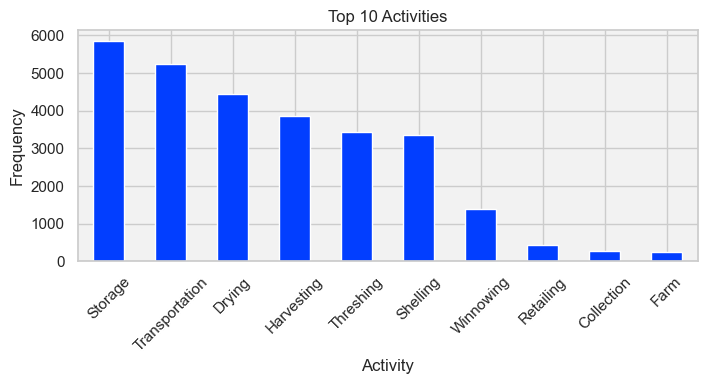

In [181]:
# Combine values from both columns into a single series
activities_series = pd.concat([activities_df['activity_1'], activities_df['activity_2']])

# Count the occurrences of each activity
top_activities = activities_series.value_counts().head(10)

# Plot the top 10 activities
plt.figure(figsize=(8, 3))
top_activities.plot(kind='bar')
plt.title('Top 10 Activities')
plt.xlabel('Activity')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [182]:
print (f"the top 10 activities are:\n {top_activities}")

the top 10 activities are:
 Storage           5844
Transportation    5227
Drying            4441
Harvesting        3845
Threshing         3441
Shelling          3358
Winnowing         1388
Retailing          441
Collection         263
Farm               243
Name: count, dtype: int64


Let's calculate the percentage that each of these activities represents in the total number of reports for each year.

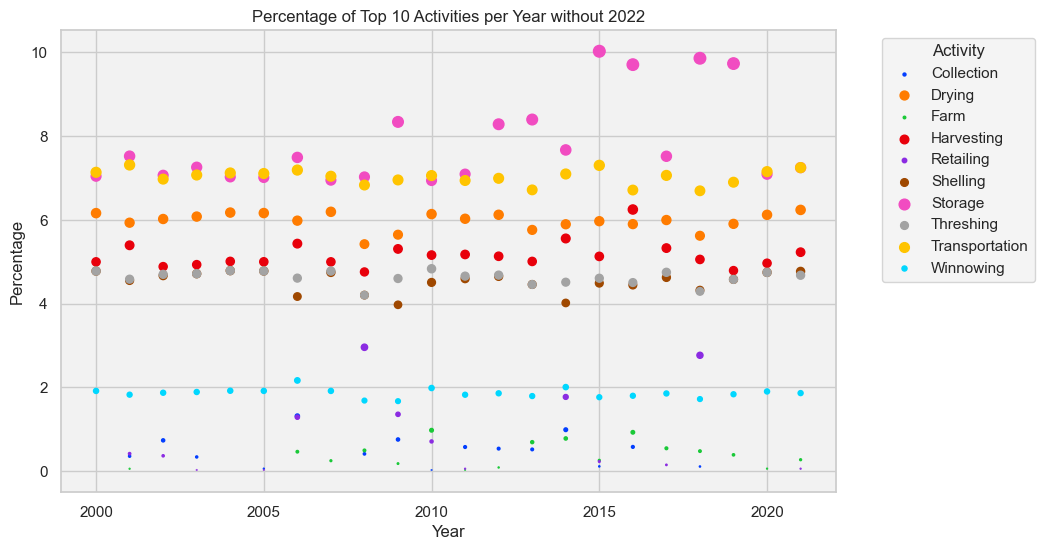

In [183]:
import matplotlib.pyplot as plt

# Define the top 10 activities
top_activities = ['Storage', 'Transportation', 'Drying', 'Harvesting', 'Threshing', 'Shelling', 'Winnowing', 'Retailing', 'Collection', 'Farm']

# Combine the two activity columns into a single series
activities_series = pd.concat([activities_df['activity_1'], activities_df['activity_2']])

# Calculate the percentage that each activity represents in the total reported activities per year
activities_percentage = activities_series.groupby([activities_df['year'], activities_series]).size().unstack().reset_index().fillna(0)
activities_percentage['total'] = activities_percentage.sum(axis=1)
activities_percentage[top_activities] = activities_percentage[top_activities].div(activities_percentage['total'], axis=0) * 100

# Filter out the year 2022
activities_percentage = activities_percentage[activities_percentage['year'] != 2022]

# Convert the DataFrame to long format
activities_percentage_long = pd.melt(activities_percentage, id_vars='year', value_vars=top_activities, var_name='Activity', value_name='Percentage')

# Create the scatter plot
plt.figure(figsize=(10, 6))
for activity, data in activities_percentage_long.groupby('Activity'):
    plt.scatter(data['year'], data['Percentage'], s=data['Percentage']*7, label=activity)  # Increase dot size by 30%

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of Top 10 Activities per Year without 2022')

# Add legend outside the plot
plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.show()


The most repetitive activity is Sotrage but it 2015 (the maximum percentage of this activity) it was only a bit higher than 10%

### <span style="color: darkblue;"><u>CONCLUSIONS:


<span style="color: darkblue;">**<u>"food_supply_stage":**

<span style="color: darkblue;">**1-<u>Farm</u> is the stage with the greatest relevance both in terms of the number of reports and for being where the highest food losses occur. Second is <u>Harvest</u>, and in third place, if we talk about the number of reports, it would be <u>Storage</u>, but if we talk about the volume of losses, then the <u>Whole supply chain</u> is at the same level as Harvest.**

<span style="color: darkblue;">**2-This classification is very stable over the years**

<span style="color: darkblue;">**3- When we relate the different food_supply_stages to the food groups, we see that the majority of reports occur in group 11 (Cereals), with reports in the rest of the food groups being much lower.**

<span style="color: darkblue;">**<u>"activities"</u>:**  

<span style="color: darkblue;">**1-Regarding activities, the large number of them and the fact that several may appear in the same report complicates their analysis.**

<span style="color: darkblue;">**2- The top 4 predominant activities are: <u>Storage, Transportation, Drying, and Harvesting. However</u>, in terms of the number of reports, annually, none of them exceeds 11%, indicating that, unlike the stages, it is much more evenly distributed in this case.**

<span style="color: darkblue;">**3- These 4 activities remain the main ones very consistently over the years.**
rs.**

# <u> 3- WHY:
In this last section we will try to stablish why this loss of food happened by analyzing the cause_loss_1 and cause_loss_1

In [184]:
# we have detected that there are 'insects' and 'insect' as well as 'infestation' and 'infestations' so we merge each one:
fao_data.replace({'cause_loss_1': 'insect', 'cause_loss_2': 'insect'}, 'insects', inplace=True)
fao_data.replace({'cause_loss_1': 'infestation', 'cause_loss_2': 'infestation'}, 'infestations', inplace=True)

In [185]:
lista1=fao_data.cause_loss_1.unique()
lista2 = fao_data.cause_loss_2.unique()
lista = set(lista1) | set(lista2)

In [186]:
print (f" the number of different causes is = {len(lista)}")

 the number of different causes is = 20


As in the previous analysis we will see the frequency of each cause in the study, through the years, and related to the previous studied variables

### <u> 3.1- Frequency of each cause in the study


In [187]:
causes_df = fao_data.drop(columns=['commodity', 'description'])

In [188]:
lista

{'contamination',
 'disease',
 'dropped',
 'handling',
 'humidity',
 'infestations',
 'insects',
 'mechanical',
 'moisture',
 nan,
 'pest',
 'predators',
 'processing',
 'rain',
 'spoilage',
 'temperature',
 'temperatures',
 'transportation',
 'trimming',
 'weather'}

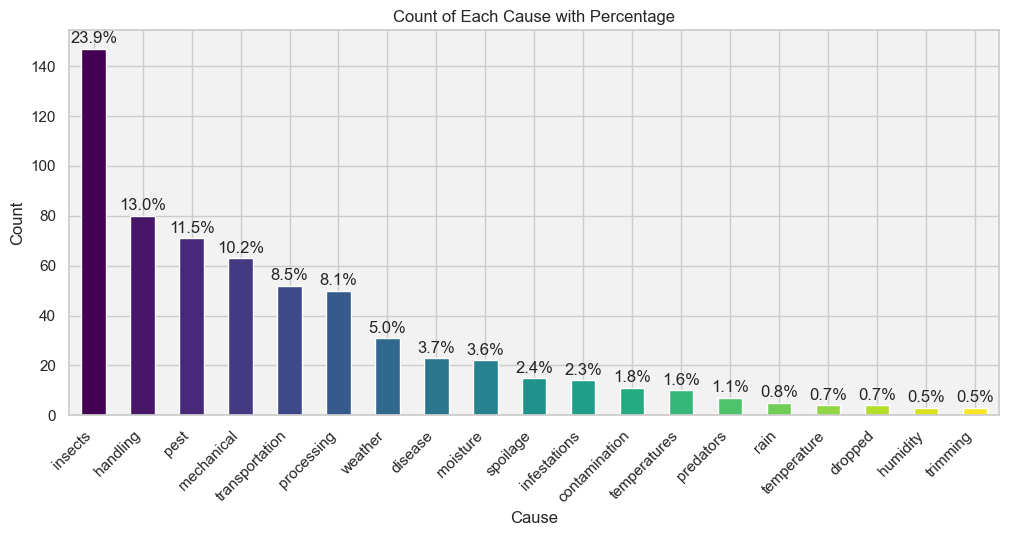

In [189]:
# Concatenate 'cause_loss_1' and 'cause_loss_2' into a single series
causes_series = pd.concat([causes_df['cause_loss_1'], causes_df['cause_loss_2']])

# Count occurrences of each cause
cause_counts = causes_series.value_counts()

# Calculate percentages
total_causes = cause_counts.sum()
cause_percentages = (cause_counts / total_causes) * 100

# Define colormap for gradient effect
colors = plt.cm.viridis(np.linspace(0, 1, len(cause_counts)))

# Plot the count of each cause with percentages and gradient colors
plt.figure(figsize=(12, 5))
ax = cause_counts.plot(kind='bar', color=colors)
plt.title('Count of Each Cause with Percentage')
plt.xlabel('Cause')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Display percentages on each bar
for i, v in enumerate(cause_counts):
    ax.text(i, v + 1, f'{cause_percentages[i]:.1f}%', ha='center', va='bottom')

plt.show()


### <u> 3.2- Frequency of each cause through the years

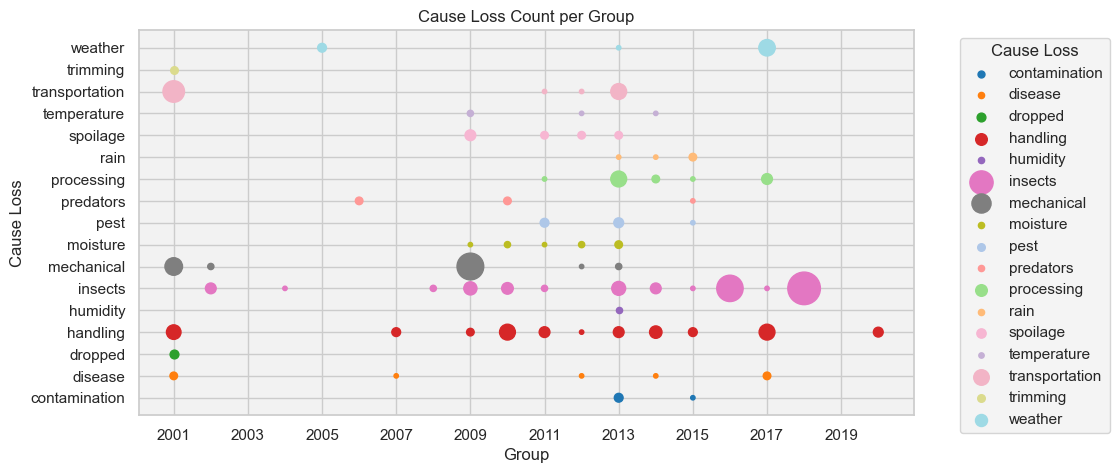

In [190]:
color_palette2 = {
    'contamination': '#1f77b4', 'disease': '#ff7f0e', 'dropped': '#2ca02c', 'handling': '#d62728', 
    'humidity': '#9467bd', 'infestations': '#8c564b', 'insects': '#e377c2', 'mechanical': '#7f7f7f', 
    'moisture': '#bcbd22', 'nan': '#17becf', 'pest': '#aec7e8', 'predators': '#ff9896', 
    'processing': '#98df8a', 'rain': '#ffbb78', 'spoilage': '#f7b6d2', 'temperature': '#c5b0d5', 
    'temperatures': '#c49c94', 'transportation': '#f2b4c6', 'trimming': '#dbdb8d', 'weather': '#9edae5'
}
# Convertir los años a enteros
count_per_year_cause_loss['year'] = count_per_year_cause_loss['year'].astype(int)

# Crear scatter plot
plt.figure(figsize=(10, 5))
for cause_loss, data in count_per_year_cause_loss.groupby('cause_loss_1'):
    plt.scatter(data['year'], data['cause_loss_1'], s=data['count']*10, label=cause_loss,
                color=color_palette2[cause_loss])

# Establecer etiquetas y título
plt.xlabel(x_label)
plt.ylabel('Cause Loss')
plt.title(f'Cause Loss Count per {x_label}')

# Asegurar que los años se muestren como enteros en el eje x y alternarlos
years = range(int(count_per_year_cause_loss['year'].min()), int(count_per_year_cause_loss['year'].max()) + 1, 2)
plt.xticks(years)

# Añadir leyenda
plt.legend(title='Cause Loss', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar gráfico
plt.grid(True)
plt.show()


it is clear that insects is the most frequent cause in the dataset but it is clear that its impact has increase a lot during the last years.

### <u> 3.2- Causes of food loss by food group

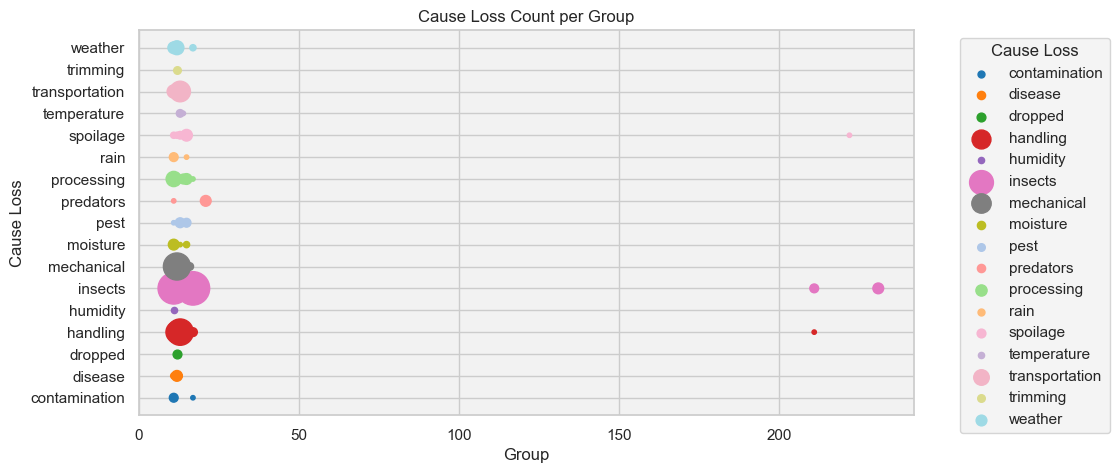

In [191]:
# Aggregate data to get count of occurrences of each cause_loss for each group
count_per_group_cause_loss = causes_df.groupby(['group', 'cause_loss_1']).size().reset_index(name='count')
x_label = 'Group'
x_values = 'group'

# Create scatter plot
plt.figure(figsize=(10, 5))
for cause_loss, data in count_per_group_cause_loss.groupby('cause_loss_1'):
    plt.scatter(data[x_values], data['cause_loss_1'], s=data['count']*10, label=cause_loss,
                color=color_palette2[cause_loss])

# Set labels and title
plt.xlabel(x_label)
plt.ylabel('Cause Loss')
plt.title(f'Cause Loss Count per {x_label}')

# Add legend
plt.legend(title='Cause Loss', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.grid(True)
plt.show()




For checking the group description we create a slicer to get its descritpion and an interactive graph to visualize the activites involved with its losses

In [192]:
group_desc = fao_data[['group','description']].drop_duplicates()
# Create a dropdown widget with group options
group_dropdown = widgets.Dropdown(
    options=group_desc['group'].tolist(),
    description='Select Group:'
)

# Create a text widget for displaying the description
description_output = widgets.Output()

# Function to display the description of the selected group
def display_description(selected_group):
    description_output.clear_output()
    description = group_desc[group_desc['group'] == selected_group]['description'].values
    with description_output:
        if len(description) > 0:
            print(description[0])
        else:
            print("No description available for this group.")

# Display the widgets
display(widgets.VBox([group_dropdown, description_output]))

# Define an event handler for the dropdown widget
def on_group_change(change):
    selected_group = change.new
    display_description(selected_group)

# Attach the event handler to the dropdown widget
group_dropdown.observe(on_group_change, names='value')

In [193]:
@interact
def plot_group_loss_cause(group=causes_df['group'].unique()):
    # Filter data for the selected group
    group_data = causes_df[causes_df['group'] == group]
    
    # Count occurrences of each loss cause for the selected group
    loss_cause_counts = group_data['cause_loss_1'].value_counts()
    
    # Plot the bar plot
    plt.figure(figsize=(10, 3))
    loss_cause_counts.plot(kind='bar', color='skyblue')
    
    # Set labels and title
    plt.xlabel('Loss Cause')
    plt.ylabel('Count')
    plt.title(f'Loss Cause Count for Group: {group}')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Show plot
    plt.grid(axis='y')
    plt.show()


interactive(children=(Dropdown(description='group', options=(231, 11, 12, 17, 15, 13, 211, 29, 16, 222, 22, 23…

### <span style="color: darkblue;"><u>CONCLUSIONS<u>:

<span style="color: darkblue;">**1-The main cause of food loss is insects, with an incidence that almost doubles the second cause. However, the loss of food due to insects has increased in recent years.**

<span style="color: darkblue;">**2- The cause that seems to remain most consistent over time is handling.**

<span style="color: darkblue;">**3- The causes of food loss, as expected, vary greatly depending on the food.**

# <span style="color: red;">FINAL CONCLUSIONS

1-This study analyzes a FAO database on food loss between the years 2000 and 2022. The highest number of data points is in 2014, and since 2019, the number of data points has decreased, possibly due to the pandemic and the time it takes for countries to compile and transmit information.

2-An average of 20 food groups per year is analyzed, amounting to about 1170 reports

3-The most studied food group is group 11, corresponding to cereals, with an average of approximately 900 reports per year. Almost all countries report food losses in this group.

4-The cereal group experiences the highest volume of losses as it is the most frequent, although the percentage of loss in each incident is not among the highest.

5-Regarding the food supply stage at the time of loss, 'Farm' is the most abundant both in volume and frequency. In second place in frequency is Harvest, and third is Storage. However, when looking at volume, the second most important is transportation. This classification is very consistent over the years.

6-In terms of activity at the time of loss, the most frequent is 'Storage', followed by 'Transportation' and 'Drying'. Despite being the most frequent, 'Storage' is usually below 10% of reported activity each year, indicating that there is no clear prevalence of some activities over others.

7-As for the cause, the most frequent are insects followed by 'handling' and 'pest'.

8-The incidence of insects has not always been the main one, it has only been so in recent years. The cause that has remained most constant throughout the studied period has been handling.